<a href="https://colab.research.google.com/github/PedroDS4/Aproximacao_otima_sinais/blob/main/Otimiza%C3%A7%C3%A3o_e_Aproxima%C3%A7%C3%A3o_%C3%93tima_de_Sinais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Aproximação de um sinal por outro em um intervalo**
Em alguns problemas, é muito comum querer aproximar um sinal complexo de um sistema por um sinal que seja mais simples e fácil para trabalhar.
Usando técnicas de otimização, existem aproximações sofisticadas, e outras mais simples, como a que será tratada nesse notebook.

Seja um sinal g(t) um sinal qualquer, queremos aproximar g(t) por um sinal de forma conhecida para aproximá-lo por esse sinal num intervalo desejado, então

$$
g(t) ≈ c p(t)
$$

e

$$
t1 \leq t \leq t2
$$

onde $p(t)$ é um sinal conhecido bem definido, por exemplo uma senoide ou uma exponencial, e o intervalo conhecido é definido por t1 e t2
Agora vamos definir o erro entre os sinais

$$
e(t) = |g(t) - cp(t)|
$$

e a energia do sinal de erro é dada então por

$$
E_{e(t)} = \int_{t1}^{t2} e(t)^2 dt
$$

então queremos minimizar a energia do erro

$$

\begin{align}
\text{min } & \, E_{e(t)} \\
\text{subject to } & \, t_1 \leq t \leq t_2
\end{align}
$$

assim vemos que o problema é de programação não linear, então podemos derivar a energia do erro em função da constante c, para achar a constante c que melhor ajusta a aproximação, temos assim

$$
\frac{\partial}{\partial c}E_{e(t)} = \frac{\partial}{\partial c} \int_{t1}^{t2} e(t)^2 dt = \int_{t1}^{t2} \frac{\partial}{\partial c} (g(t) - cp(t))^2 dt = 0
$$

utilizando a regra da cadeia, temos

$$
 \frac{\partial}{\partial c} (g(t) - cp(t))^2 = -2p(t)(g(t) - cp(t))
$$

substituindo na integral e igualando a zero

$$
\int_{t1}^{t2} -2p(t)(g(t) - cp(t)) dt = -2 \int_{t1}^{t2} p(t)g(t)dt + 2\int_{t1}^{t2} cp(t)^2 dt
$$

e finalmente temos

$$
c = \frac{\int_{t1}^{t2} p(t)g(t)dt}{\int_{t1}^{t2} p(t)^2 dt}
$$

para o caso discreto que iremos trabalhar, temos similarmente

$$
c = \frac{\sum_{n1}^{n2} p[n] \cdot g[n]}{\sum_{n1}^{n2} p[n]^2}
$$


##**Sinais ortogonais**
Se os sinais g(t) e p(t) forem muito "diferentes", é possível observar que ocorrerá que o valor c se tornará próximo de zero, dizemos que se isso acontece, a integral $\int_{t1}^{t2} p(t)g(t)dt$ é nula e os vetores são ortogonais.


##**Aproximando uma parábola por uma função cosseno**
Seja a função $g(t) = 4-t^2$ centrada na origem, queremos aproximar essa parábola por uma senoide $p(t) = cos(t)$ no intervalo temporal $I = [-2,2]$.

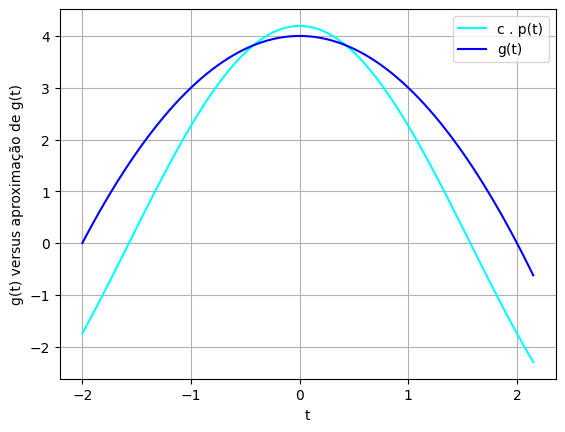

O valor de c ótimo para o cosseno é 4.1937823437119235


In [ ]:

import numpy as np
import matplotlib.pyplot as plt


#Aproximando uma parábola por uma senoide
n = np.arange(-2,2+0.2,0.05)
g_n = 4-n**2
p_n = np.cos(n)

#Valor ótimo de c
c = np.sum(p_n*g_n)/np.sum(p_n**2)
g_aprox = p_n*c
plt.plot(n,g_aprox,'cyan',label='c . p(t)')
plt.plot(n,g_n,'blue',label='g(t)')
plt.xlabel('t')
plt.ylabel('g(t) versus aproximação de g(t)')
plt.legend()
plt.grid()
plt.show()

print(f'O valor de c ótimo para o cosseno é {c}')